## Section 1 - Business Understading
### Analysis on Airbnb datasheet from Rio de Janeiro - Brazil ##


#### GOAL - Find out what affects pricing in Rio de Janeiro Airbnb.

##### Questions

##### 1 - How does number of rooms, beds and guests affects our price?

##### 2 - What are the most common amenities? And the most important for pricing?

##### 3 - And lastly, how important is location in Rio de Janeiro?


In [1]:
#Import dataset and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import init_notebook_mode, iplot
import os
import operator
init_notebook_mode(connected=True) 
%matplotlib inline
px.set_mapbox_access_token(os.environ.get('map_token'))



## Section 2 - Data Understading
#### Gather

In [2]:
df = pd.read_csv('listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20210222161029,2021-02-23,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,...,10.0,10.0,9.0,NaN,t,1,1,0,0,2.01
1,24480,https://www.airbnb.com/rooms/24480,20210222161029,2021-02-23,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,"The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,...,10.0,10.0,9.0,NaN,f,1,1,0,0,0.67
2,25026,https://www.airbnb.com/rooms/25026,20210222161029,2021-02-23,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,3746246,https://www.airbnb.com/users/show/3746246,...,10.0,10.0,9.0,NaN,f,11,11,0,0,1.82
3,35636,https://www.airbnb.com/rooms/35636,20210222161029,2021-02-24,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,The apartment street is very quiet and safe ....,https://a0.muscache.com/pictures/20009355/38b6...,153232,https://www.airbnb.com/users/show/153232,...,10.0,10.0,9.0,NaN,f,1,1,0,0,2.02
4,35764,https://www.airbnb.com/rooms/35764,20210222161029,2021-02-23,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,https://www.airbnb.com/users/show/153691,...,10.0,10.0,10.0,NaN,f,1,1,0,0,2.79


## Section 3 - Data Preparation
#### Assess

In [3]:
#Creating a dataframa more suited for our questions
X = df[['latitude' , 'longitude' , 'property_type' , 'room_type' , 'accommodates' , 'bathrooms' , 'bedrooms' , 'beds' , 'amenities' , 'price']]
X.head()

,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price
0,-22.96592,-43.17896,Entire condominium,Entire home/apt,5,NaN,2.0,2.0,"[""Air conditioning"", ""Essentials"", ""Luggage dr...",$221.00
1,-22.98570,-43.20193,Entire apartment,Entire home/apt,2,NaN,1.0,1.0,"[""Extra pillows and blankets"", ""Air conditioni...",$307.00
2,-22.97712,-43.19045,Entire apartment,Entire home/apt,2,NaN,1.0,2.0,"[""Elevator"", ""Dedicated workspace"", ""Kitchen"",...",$160.00
3,-22.98816,-43.19359,Entire apartment,Entire home/apt,2,NaN,1.0,1.0,"[""Air conditioning"", ""Essentials"", ""Luggage dr...",$273.00
4,-22.98127,-43.19046,Entire loft,Entire home/apt,2,NaN,1.0,1.0,"[""Extra pillows and blankets"", ""Air conditioni...",$135.00


In [4]:
#Checking for NaN values
print(X.shape)
X.isna().sum()

(26615, 10)


latitude             0
longitude            0
property_type        0
room_type            0
accommodates         0
bathrooms        26615
bedrooms          1746
beds               252
amenities            0
price                0
dtype: int64

In [5]:
#It seems we have issues in the bathroom column, so we must drop it. 
#For bedrooms, we will assume the value based on 'accommodates' to have the most precise value possible and copy this value to the beds.
X.drop('bathrooms',  axis='columns', inplace=True)
bedrooms_ratio = X['accommodates'].mean()/X['bedrooms'].mean()
X['bedrooms'].fillna(df.accommodates * bedrooms_ratio, inplace = True)
X['beds'].fillna(X.bedrooms, inplace = True)

X.isna().sum()
#X.head()

latitude         0
longitude        0
property_type    0
room_type        0
accommodates     0
bedrooms         0
beds             0
amenities        0
price            0
dtype: int64

In [6]:
#Now we need to treat our 'price' column since it is an object
X['price'] = X['price'].apply(lambda x: x.strip('$').replace(',',''))
X['price'] = pd.to_numeric(X['price'])
X.head()

,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price
0,-22.96592,-43.17896,Entire condominium,Entire home/apt,5,2.0,2.0,"[""Air conditioning"", ""Essentials"", ""Luggage dr...",221.0
1,-22.98570,-43.20193,Entire apartment,Entire home/apt,2,1.0,1.0,"[""Extra pillows and blankets"", ""Air conditioni...",307.0
2,-22.97712,-43.19045,Entire apartment,Entire home/apt,2,1.0,2.0,"[""Elevator"", ""Dedicated workspace"", ""Kitchen"",...",160.0
3,-22.98816,-43.19359,Entire apartment,Entire home/apt,2,1.0,1.0,"[""Air conditioning"", ""Essentials"", ""Luggage dr...",273.0
4,-22.98127,-43.19046,Entire loft,Entire home/apt,2,1.0,1.0,"[""Extra pillows and blankets"", ""Air conditioni...",135.0


In [7]:
#We have some outliers that need to be dealt with in our price column, our goal is to analyze normal properties, so let's set a generous limit of $10,000.
overpriced = X[ X['price'] > 10000 ].index
X.drop(overpriced, inplace = True)
print(sum(X['price']>10000))

0


## Section 4 - Evaluation


#### **Question 1 - Analysis on number of beds, bedrooms and guests**

              latitude  longitude  accommodates  bedrooms      beds     price
latitude      1.000000   0.326653     -0.135630 -0.052604 -0.089760 -0.135932
longitude     0.326653   1.000000     -0.092847 -0.016169 -0.082716 -0.101000
accommodates -0.135630  -0.092847      1.000000  0.357308  0.684800  0.394520
bedrooms     -0.052604  -0.016169      0.357308  1.000000  0.258096  0.190710
beds         -0.089760  -0.082716      0.684800  0.258096  1.000000  0.250931
price        -0.135932  -0.101000      0.394520  0.190710  0.250931  1.000000


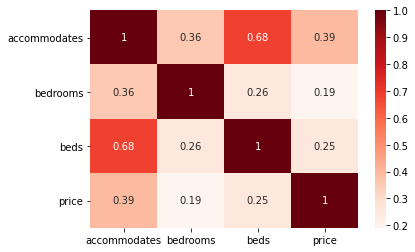

In [8]:
#To start, we can plot a corr graph, nothing is clear in regards to latitude and longitude yet.
plt.figure()
sns.heatmap(X[['accommodates' , 'bedrooms' , 'beds' , 'price']].corr(), annot=True, cmap='Reds')
print(X.corr())


**From the heatmap, we have our first surprising result. It seems to be more important to accommodate extra people instead of having extra rooms. So smaller properties with less rooms but more beds are more expensive than bigger houses.** 

#### **Question 2 - Analysis  on amenities**

In [9]:
#Our amenities column is a list, we could either just count how many we have in each property or create new columns with booleans for each possible amenity.
#We are going to start with the former
#Transforming the 'amenities' column into proper lists so we can count unique values
def to_1D(series):
    '''
    Function to reduce dimensions to apply pandas functions
    credit to https://www.educative.io/edpresso/how-to-count-unique-items-in-pandas
    '''
    return pd.Series([x for _list in series for x in _list])
temp_df = X['amenities']
temp_df = temp_df.apply(eval)
temp_df_values = to_1D(temp_df).value_counts()
#temp_df

In [10]:
# Transform 'amenities' column into booleans
def boolean_df(item_lists, unique_items):
    '''
    Function to create a new dataframe where the Index are the unique values and each row has True or False only.
    credit to https://www.educative.io/edpresso/how-to-count-unique-items-in-pandas
    '''
    
    # Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)
boolean_amenities = boolean_df(temp_df, temp_df_values.keys())

boolean_amenities.head()

,Kitchen,Wifi,Long term stays allowed,Essentials,TV,Air conditioning,Hangers,Iron,Washer,Elevator,...,Paid parking off premises – BRL10 per day,"kit básico, modelo de hotel. conditioner",LUX body soap,cooktop à gás gas stove,onsul stainless steel gas stove,Onsite restaurant — Granada Restaurant,Fogão a gas de 4 bocas gas stove,Shared gym nearby,Consul duas portas refrigerator,Paid parking garage off premises – BRL15 per hour
0,True,True,True,True,True,True,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,True,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,True,True,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,True,True,False,True,True,True,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [11]:
#Now we will have to drop all columns with values that appear less than 200 times
boolean_amenities.drop([col for col, val in boolean_amenities.sum().iteritems() if val < 200], axis=1, inplace=True)
X = pd.concat([X,boolean_amenities],axis = 1).drop('amenities', axis = 1)
X.head()

,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,Kitchen,Wifi,...,Shower gel,Smart lock,Toaster,Babysitter recommendations,Portable fans,Lake access,Keypad,Hot water kettle,Clothing storage: wardrobe,Baby safety gates
0,-22.96592,-43.17896,Entire condominium,Entire home/apt,5,2.0,2.0,221.0,True,True,...,False,False,False,False,False,False,False,False,False,False
1,-22.98570,-43.20193,Entire apartment,Entire home/apt,2,1.0,1.0,307.0,False,True,...,False,False,False,False,False,False,False,False,False,False
2,-22.97712,-43.19045,Entire apartment,Entire home/apt,2,1.0,2.0,160.0,True,True,...,False,False,False,False,False,False,False,False,False,False
3,-22.98816,-43.19359,Entire apartment,Entire home/apt,2,1.0,1.0,273.0,True,True,...,False,False,False,False,False,False,False,False,False,False
4,-22.98127,-43.19046,Entire loft,Entire home/apt,2,1.0,1.0,135.0,True,True,...,False,False,False,False,False,False,False,False,False,False


[('Hot tub', 1113.7393497757848), ('Bathtub', 878.2360801781737), ('Dishwasher', 836.6432964329643), ('Pool', 820.3408393039919), ('Dryer', 803.9127933732168)]
[('Cleaning products', 287.73401162790697), ('Clothing storage: wardrobe', 286.57339449541286), ('Portable fans', 285.67952522255194), ('Ceiling fan', 278.06349206349205), ('Lock on bedroom door', 247.29091371850345)]


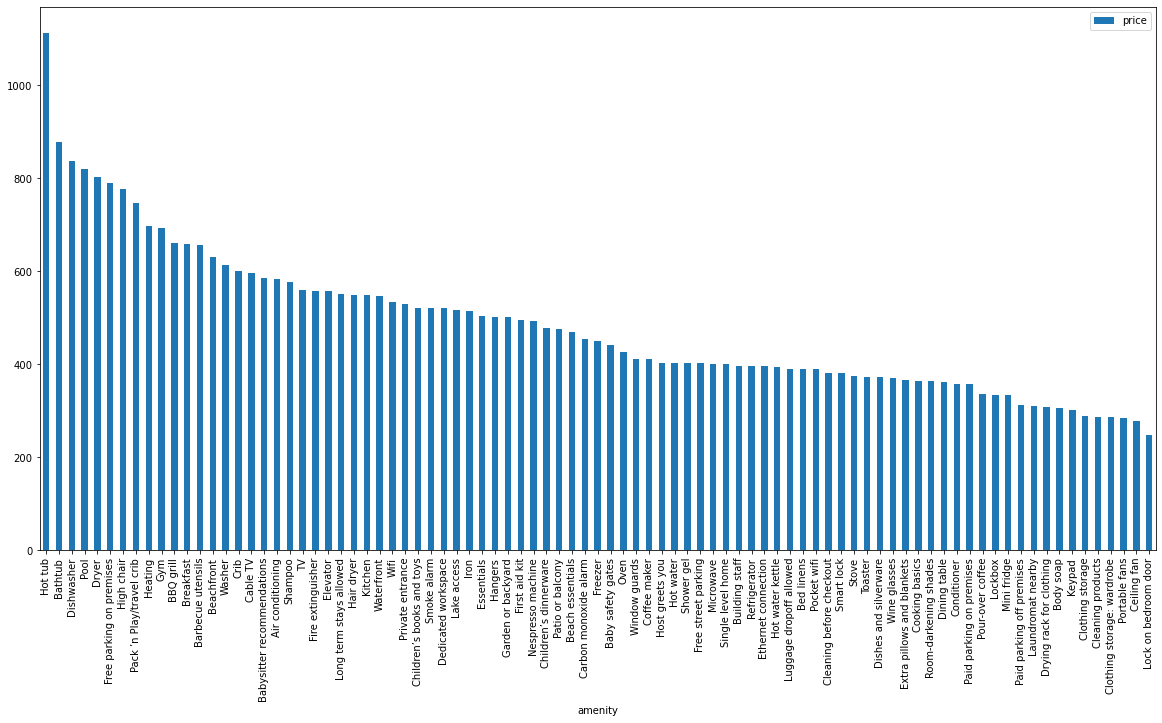

In [12]:
#Now let's see based on each amenity, which one has the higher average price, printing only the first 5 and last 5 values.
dict_amenities = {}
for x in boolean_amenities:
    true_amenities = X[X[x] == True]
    dict_amenities[x] = true_amenities['price'].mean()
sorted_tuples = sorted(dict_amenities.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_tuples[0:5])
print(sorted_tuples[-5:])
pd.DataFrame(sorted_tuples, columns=['amenity','price']).set_index('amenity').plot(figsize=(20,10) , kind='bar');

**So, it seems there is a huge gap among average prices for each amenity. And it does makes sense, the most expensive amenities are the ones more common to bigger properties while the cheaper ones are usually related to single rooms.**



In [13]:
#We can quickly check the most common amenities
print(boolean_amenities.sum()[:19])

Kitchen                    23960
Wifi                       23573
Long term stays allowed    22727
Essentials                 22448
TV                         22053
Air conditioning           21021
Hangers                    18259
Iron                       17356
Washer                     16556
Elevator                   16277
Hot water                  15186
Dedicated workspace        14862
Dishes and silverware      12521
Refrigerator               11239
Hair dryer                 10969
Microwave                  10579
Cooking basics             10379
Cable TV                    9877
Stove                       9831
dtype: int64


**As expected, the most common amenities are the one present in most houses**

In [14]:
#Now, we can check if the number of amenities has a big influence on price, first let's create a column on our main dataframe with that information.
number_amenities = boolean_amenities.sum(axis = 1)
X = pd.concat([X,number_amenities.rename('number_amenities')],axis = 1)
X.head()

,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,Kitchen,Wifi,...,Smart lock,Toaster,Babysitter recommendations,Portable fans,Lake access,Keypad,Hot water kettle,Clothing storage: wardrobe,Baby safety gates,number_amenities
0,-22.96592,-43.17896,Entire condominium,Entire home/apt,5,2.0,2.0,221.0,True,True,...,False,False,False,False,False,False,False,False,False,27
1,-22.98570,-43.20193,Entire apartment,Entire home/apt,2,1.0,1.0,307.0,False,True,...,False,False,False,False,False,False,False,False,False,21
2,-22.97712,-43.19045,Entire apartment,Entire home/apt,2,1.0,2.0,160.0,True,True,...,False,False,False,False,False,False,False,False,False,13
3,-22.98816,-43.19359,Entire apartment,Entire home/apt,2,1.0,1.0,273.0,True,True,...,False,False,False,False,False,False,False,False,False,28
4,-22.98127,-43.19046,Entire loft,Entire home/apt,2,1.0,1.0,135.0,True,True,...,False,False,False,False,False,False,False,False,False,29


In [15]:
#To check the correlation between price and number of amenities, we will split our df in 4, based on the quartiles
X['number_amenities'].describe()

count    26495.000000
mean        17.683676
std          8.693674
min          0.000000
25%         11.000000
50%         16.000000
75%         24.000000
max         60.000000
Name: number_amenities, dtype: float64

In [16]:
#Spliting our dataframe in quartiles based on 'number_amenities' and then checking the average price for each
q1 = X[((X['number_amenities']>=0) & (X['number_amenities']<=11))]
q2 = X[((X['number_amenities']>11) & (X['number_amenities']<=16))]
q3 = X[((X['number_amenities']>16) & (X['number_amenities']<=24))]
q4 = X[((X['number_amenities']>24))]
print('The average price for rentals with up to 11 amenities is ${:.2f}'.format(q1['price'].mean()))
print('The average price for rentals with between 12 and 16 amenities ${:.2f}'.format(q2['price'].mean()))
print('The average price for with between 17 and 24 amenities is ${:.2f}'.format(q3['price'].mean()))
print('The average price for with more than 24 amenities is ${:.2f}'.format(q4['price'].mean()))

The average price for rentals with up to 11 amenities is $611.96
The average price for rentals with between 12 and 16 amenities $631.31
The average price for with between 17 and 24 amenities is $491.61
The average price for with more than 24 amenities is $432.67


<AxesSubplot:>

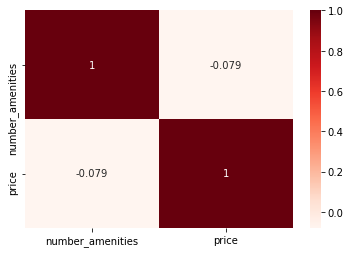

In [17]:
#The result is quite unexpected, just to make sure it is correct, let's use another heatmap for the correlation
plt.figure()
sns.heatmap(X[['number_amenities' , 'price']].corr(), annot=True, cmap='Reds')

**The results seem consistent, listing more amenities in an Airnbn property is *not* an important factor!**
**To summarize our second question, some amenities can be a differential, but just adding as many as possible when creating a property profile on Airbnb does not help**

**Question 3 - Location analysis**

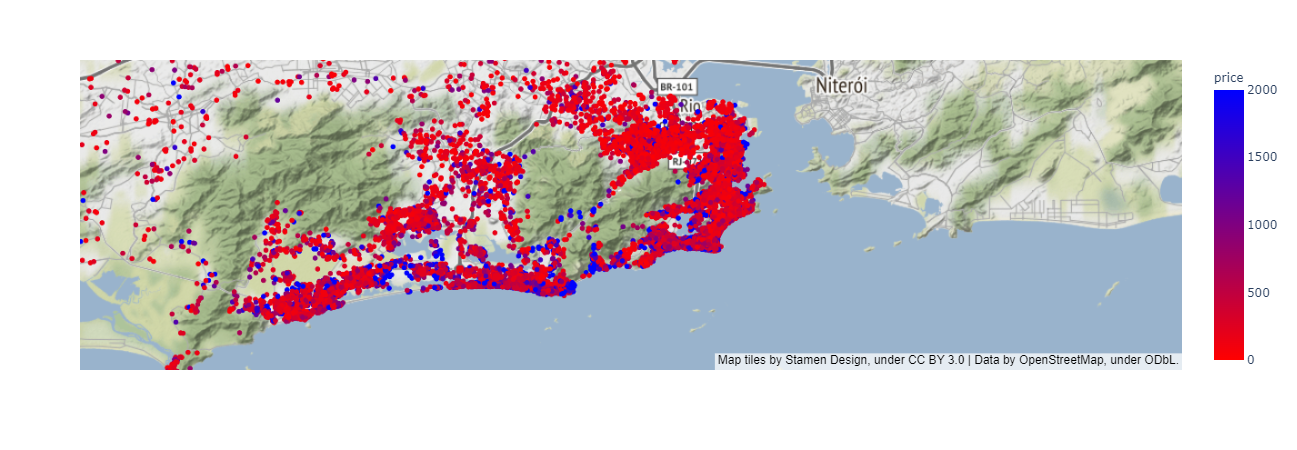

In [18]:
#Since this is about location, it will be easier to just check it on a map and draw some conclusions from there.
fig = px.scatter_mapbox(X, lat='latitude', lon='longitude', color="price",color_continuous_scale='Bluered_r', size_max=4, zoom=10,range_color=[0,2000],mapbox_style='stamen-terrain')
fig.show()

**As expected, location is a particularly important factor! The beaches are famous in Rio de Janeiro, so they are also more expensive. Also, north of the "Lagoa de Jacarepaguá" there are lots of convention centers therefore a higher concentration of properties It also goes up in price the closer they are to the center itself.**